In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_validate
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression


In [ ]:
dataset = fetch_california_housing(as_frame = True)
X = dataset['data']
y = dataset['target']

X1 = StandardScaler().fit_transform(X)
X = pd.DataFrame(X1, columns=X.columns)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-0.007901,-0.000862,0.000732,0.005771,0.000621,-0.004275,0.004345,-0.002366
std,1.001465,0.999477,1.050939,1.070296,1.009785,0.618925,1.001543,1.001168
min,-1.774299,-2.196180,-1.852319,-1.610768,-1.256123,-0.223445,-1.447568,-2.385992
25%,-0.696396,-0.845393,-0.404995,-0.191775,-0.562926,-0.061682,-0.792107,-1.113209
50%,-0.186191,0.028646,-0.085143,-0.101171,-0.229132,-0.024379,-0.642287,0.533922
75%,0.451437,0.664310,0.249344,0.005979,0.266261,0.020488,0.977638,0.778496
max,5.858286,1.856182,55.163236,69.571713,30.250330,57.448030,2.958068,2.625280


In [ ]:
y[20:60]

## PCA

---



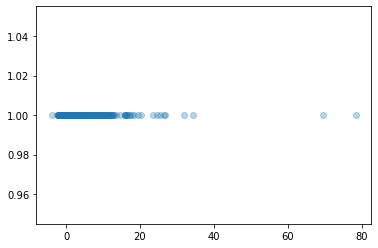

In [ ]:
 pca = PCA(n_components=1).fit(X_train)
 plt.scatter(pca.transform(X_train), np.ones(len(X_train)), alpha=0.3, label="")
 #plt.scatter(pca.transform(X_train), np.random.randn(len(X_train)), alpha=0.3, label="")
 plt.show()

In [ ]:
print(X_train.columns)
print(pca.components_)
print(pca.explained_variance_ratio_)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
[[ 0.14100435 -0.09413559  0.65979971  0.63205891 -0.10660448 -0.00550511
   0.27456258 -0.22280644]]
[0.28632926]


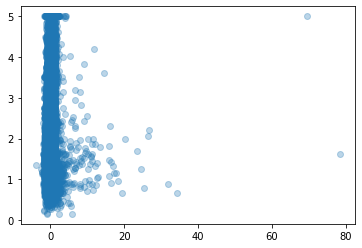

In [ ]:
 pca = PCA(n_components=1).fit(X_train)
 plt.scatter(pca.transform(X_train), y_train, alpha=0.3, label="")
 plt.show()

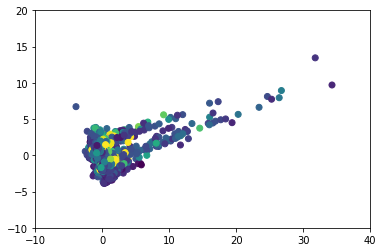

[[ 0.5449933  -1.64499907]
 [-1.11874037  0.45504355]
 [-0.46286696  0.95543653]
 ...
 [-0.8318609   0.33280432]
 [ 0.51059771  1.47022579]
 [-0.1590032  -1.69286103]]
[ 0.5449933  -1.11874037 -0.46286696 ... -0.8318609   0.51059771
 -0.1590032 ]


In [ ]:
 pca = PCA(n_components=2).fit(X_train)
 #plt.scatter(np.transpose(pca.transform(X_train))[0], np.transpose(pca.transform(X_train))[1], label="")
 plt.scatter(np.transpose(pca.transform(X_train))[0], np.transpose(pca.transform(X_train))[1], c=y_train, label="")
 plt.xlim(-10,40)
 plt.ylim(-10,20)
 plt.show()

 print(pca.transform(X_train))
 print(np.transpose(pca.transform(X_train))[0])

In [ ]:
print(X_train.columns)
print(pca.components_)
print(pca.explained_variance_ratio_)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
[[ 0.14100435 -0.09413559  0.65979971  0.63205891 -0.10660448 -0.00550511
   0.27456258 -0.22280644]
 [ 0.13602996 -0.20832667  0.22973298  0.22604912  0.17374872  0.00858278
  -0.62211799  0.6456991 ]]
[0.28632926 0.25453168]


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print( np.sqrt(mean_squared_error(y_test, pred)) )
print( r2_score(y_test, pred) )

0.726534556757837
0.6075494500520069


In [ ]:
pca = PCA(n_components=5).fit(X_train)
lr = LinearRegression()
lr.fit(pca.transform(X_train), y_train)
pred = lr.predict(pca.transform(X_test))
print( np.sqrt(mean_squared_error(y_test, pred)) )
print( r2_score(y_test, pred) )

0.8274832336553447
0.49091441940786773


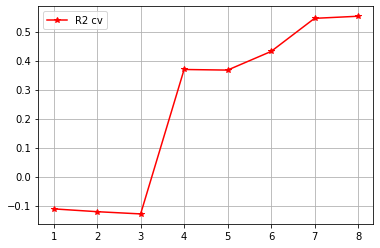

In [ ]:
r2_cv = []
for i in range(1, 9):
  pca = PCA(n_components=i).fit(X) # Não recomendado
  lr = LinearRegression()
  cv_results = cross_validate(lr, pca.transform(X), y, cv=5, scoring=('r2'))
  r2_cv.append( np.mean(cv_results['test_score']) )
#plt.plot(np.arange(1,len(r2_list)+1), r2_list,"b*-", label='max_depth')
plt.plot(np.arange(1, 9), r2_cv,"r*-", label='R2 cv')
plt.legend()
plt.grid()
plt.show()

In [ ]:
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)
pred = pls.predict(X_test)
print( np.sqrt(mean_squared_error(y_test, pred)) )
print( r2_score(y_test, pred) )

0.8024505392770693
0.5212498347895653


In [ ]:
print(X_train.columns)
print(pls.coef_)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
[[ 0.74414757]
 [ 0.10515145]
 [ 0.15373708]
 [-0.05200805]
 [-0.0244161 ]
 [-0.03614317]
 [-0.15557937]
 [-0.04929951]]


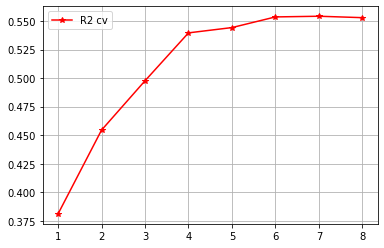

In [ ]:
r2_cv = []
for i in range(1, 9):
  pls = PLSRegression(n_components=i)
  pls.fit(X, y)
  cv_results = cross_validate(pls, X, y, cv=5, scoring=('r2'))
  r2_cv.append( np.mean(cv_results['test_score']) )
#plt.plot(np.arange(1,len(r2_list)+1), r2_list,"b*-", label='max_depth')
plt.plot(np.arange(1, 9), r2_cv,"r*-", label='R2 cv')
plt.legend()
plt.grid()
plt.show()

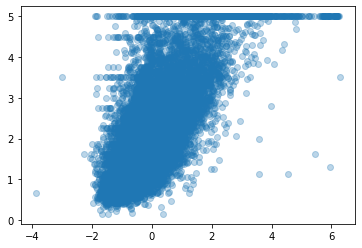

In [ ]:
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)
plt.scatter(pls.transform(X_train), y_train, alpha=0.3, label="")
plt.show()

No handles with labels found to put in legend.


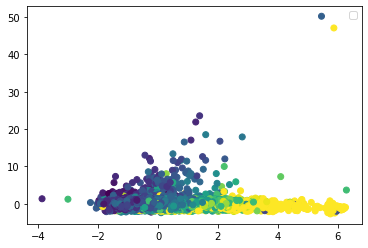

In [ ]:
pls = PLSRegression(n_components=2).fit(X_train, y_train)
plt.scatter(np.transpose(pls.transform(X_train))[0], np.transpose(pls.transform(X_train))[1], c=y_train)
plt.legend()
plt.show()

No handles with labels found to put in legend.


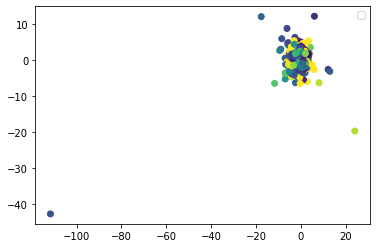

In [ ]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X_test)
plt.scatter(np.transpose(X_transformed)[0], np.transpose(X_transformed)[1], c=y_test)
plt.legend()
plt.show()

No handles with labels found to put in legend.


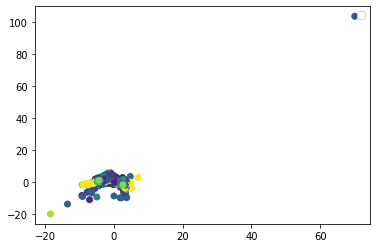

In [ ]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X_test)
plt.scatter(np.transpose(X_transformed)[0], np.transpose(X_transformed)[1], c=y_test)
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


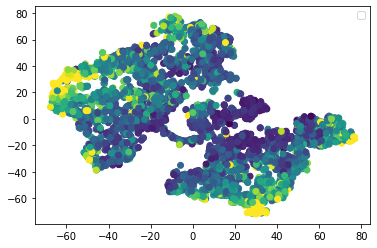

In [ ]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2)
X_transformed = embedding.fit_transform(X_test)
plt.scatter(np.transpose(X_transformed)[0], np.transpose(X_transformed)[1], c=y_test)
plt.legend()
plt.show()